In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [13]:
omega_m , chi2 = np.load("/home/gabriele/astrocosmolib/chi2_values.npy")

In [14]:
posterior = np.exp(-0.5*chi2)
k = 1.1*np.max(posterior)

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_10417/110355449.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("P$\omega_m$")


Text(0, 0.5, 'P$\\omega_m$')

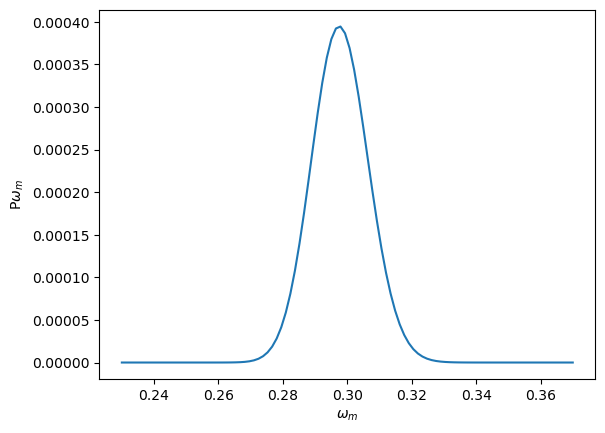

In [15]:
plt.plot(omega_m, posterior)
plt.xlabel(r"$\omega_m$")
plt.ylabel("P$\omega_m$")

In [17]:
interp_posterior = interp1d(omega_m, posterior, kind = "cubic")

In [18]:
n_attempts = 10000
omega_m_try = np.random.uniform(0.23, 0.37, n_attempts)
u = np.random.uniform(0, 1, n_attempts)

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_10417/1559038388.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$P\omega_m$")


Text(0, 0.5, '$P\\omega_m$')

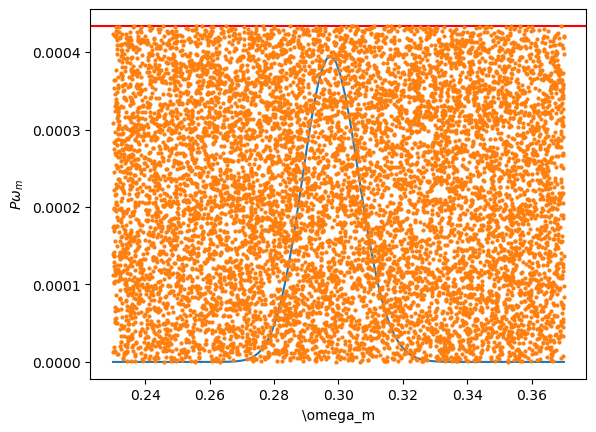

In [19]:
plt.plot(omega_m, posterior)
plt.axhline(k, color = "red")
plt.plot(omega_m_try, u*k, "o", ms = "2")
plt.xlabel(r"\omega_m")
plt.ylabel("$P\omega_m$")

In [20]:
ff = interp_posterior(omega_m_try)#interpolating the posterior

In [21]:
acc = ff > u*k 
acc

array([False, False, False, ..., False, False, False], shape=(10000,))

In [22]:
sum(acc) #somma di booleani, quindi conta gli accettati

np.int64(1408)

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_10417/2725947510.py:6: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$P\omega_m$")


Text(0, 0.5, '$P\\omega_m$')

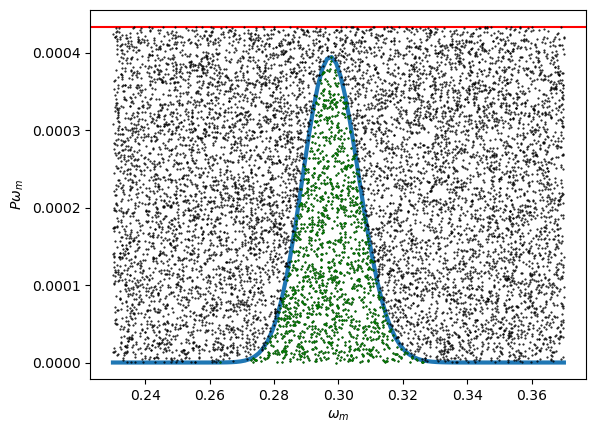

In [23]:
plt.plot(omega_m , posterior, lw = 3)
plt.axhline(k, color = "red")
plt.plot(omega_m_try, u*k, "o", ms = "0.5", color = "k")
plt.plot(omega_m_try[acc], u[acc]*k, ".", ms = "1", color = "g")
plt.xlabel(r"$\omega_m$")
plt.ylabel("$P\omega_m$")

In [24]:
print("omega_m : {mean:2.4f} +/- {std:2.4f}".format(mean = np.mean(omega_m_try[acc]), std = np.std(omega_m_try[acc])))

omega_m : 0.2974 +/- 0.0090
